# Computer Infrastructure Task Notebook

## Task 1: Create Directory Structure
To create a directory use the `mkdir` command and follow it with the directory name. The below will create a directory in your current location called data.

In [ ]:
mkdir data

To open the newly created folder the `cd` command can be used.

In [ ]:
cd data

To create folders within this directory use `mkdir`. `mkdir` can accept multiple arguments to create a number of folders at a time. For example to create two folders called weather and timestamps you could use the below.

In [ ]:
mkdir weather timestamps

To check the creation of the folders you can use `ls` to show the contents of the current working directory.

In [ ]:
ls

## Task 2: Timestamps
The `date` command outputs the current date and time stamp. To output this information into a file you can use `>` then the file name for the date to be overwritten each time or `>>` then the file name to append the new data.

In [ ]:
date >> now.txt

To check the contents of the file the `more` command can be used.

In [ ]:
more now.txt

## Task 3: Formatting Timestamps
For more information about a command `man` then the command name can be used.

In [ ]:
man date

To output the year `%Y` can be used for the full year or `%y` for the last two digits of the year. The month is retrieved with `%m` for a numerical output, or `%B` for the month in text or `%b` for the abbreviate name eg Jan. The day of the date is outputted with `%d`, the hour `%H`, the minutes `%M` and the seconds `%S`.  A quick way of getting the time is `%T`, this is automatically formatted with colons between the items.

To output the timestamp in numbers as year month day_hours seconds the format for the date would be `%Y%m%d`. To output the time in hours, minutes and seconds without separators the format would be be `"%h%M%S`. If you would like separators between the returns these are typed in the output eg `%H:%M` would give you a time in this format 12:15.


In [ ]:
date +%Y%m%d_%H%M%S 

Gives an output that looks like 20241104_112942. To append this information to a file use `>>` and the file name.

In [ ]:
date +%Y%m%d_%H%M%S >> formatted.txt

## Task 4: Create Timestamped files
To create a file the `touch` command can be used. `touch testnow.txt` would create a file called testnow.txt. To create a file with the a current timestamp you would use backticks around the date command and the formatting elements and include .txt to tell it the type of file.

In [ ]:
touch `date +%Y%m%d_%H%M%S.txt`

## Task 5:Download Today's Weather Data
Change to the data/weather directory. Download the latest weather data for the Athenry weather station from Met Eireann using wget. Use the -O <filename> option to save the file as weather.json. The data can be found at this URL:
https://prodapi.metweb.ie/observations/athenry/today.

In [ ]:
cd .\data\weather

To get if wget is downloaded you can call the wget version.

In [ ]:
wget -V

In [ ]:
sudo apt install wget

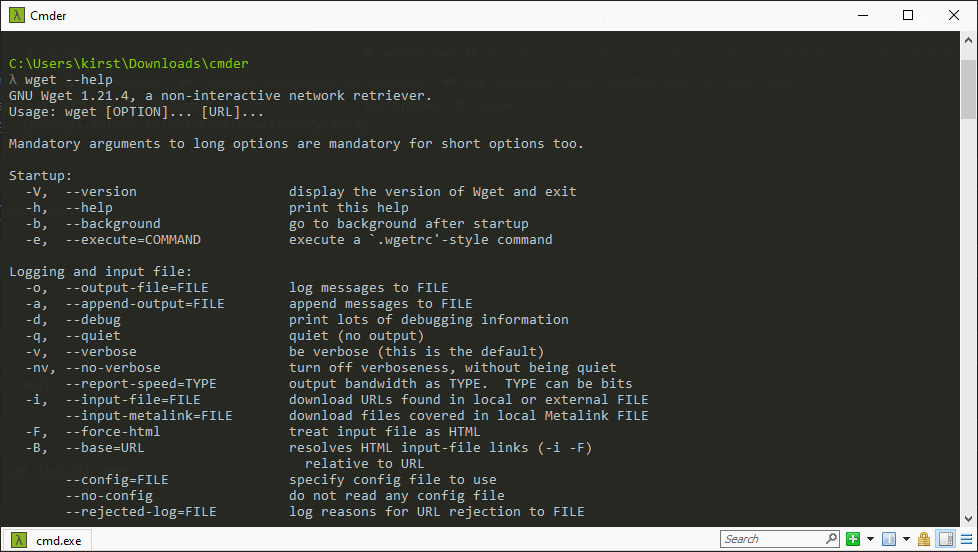

In [ ]:
wget --help

In [ ]:
wget -O weather.json https://prodapi.metweb.ie/observations/athenry/today

## Task 6: Timestamp the 
Modify the command from Task 5 to save the downloaded file with a timestamped name in the format YYYYmmdd_HHMMSS.json.

In [ ]:
wget -O `date +%Y%m%d_%H%M%S.json` https://prodapi.metweb.ie/observations/athenry/today

total 16
drwxrwxrwx+ 2 codespace root      4096 Nov  8 11:14 ./
drwxrwxrwx+ 4 codespace root      4096 Nov  4 10:55 ../
-rw-rw-rw-  1 codespace codespace 3289 Nov  8 11:14 20241108_111414.json
-rw-rw-rw-  1 codespace root        23 Nov  4 10:46 push.txt

@kknb1982 ➜ /workspaces/Computer_infrastructure/data/weather (main) $ wget https://prodapi.metweb.ie/observations/athenry/today
--2024-11-08 10:59:23--  https://prodapi.metweb.ie/observations/athenry/today
Resolving prodapi.metweb.ie (prodapi.metweb.ie)... 139.162.185.91
Connecting to prodapi.metweb.ie (prodapi.metweb.ie)|139.162.185.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/json]
Saving to: ‘today’

today                                                      [ <=>                                                                                                                       ]   3.21K  --.-KB/s    in 0s      


## Task 7:  Write the Script
The first line of the file contains the "shebang" which says how to execute the file. For this file we are using `#! /bin/bash` to say run the code in bash. On a new line we start writing our code. 
This time the code has been altered to say within `wget` download the data from the web address and save it in the folder data/weather as a timestamped JSON file.

In [ ]:
#! /bin/bash

wget -O data/weather/`date +%Y%m%d_%H%M%S.json` https://prodapi.metweb.ie/observations/athenry/today

To run the code type `./weather.sh` on the command line. This did not work as we don't have the permission to run this as an executable file. This can be updated using the `chmod` command and indicating the file permissions to be altered.

In [ ]:
chmod u+x ./weather.sh

Now the code should be executable.

In [ ]:
./weather.sh

## Task 8: Notebook
Create a notebook called weather.ipynb at the root of your repository. In this notebook, write a brief report explaining how you completed Tasks 1 to 7. Provide short descriptions of the commands used in each task and explain their role in completing the tasks.

## Task 9: pandas
In your weather.ipynb notebook, use the pandas function read_json() to load in any one of the weather data files you have downloaded with your script. Examine and summarize the data. Use the information provided data.gov.ie to write a short explanation of what the data set contains.

### Collect the data and make a dataframe

In [10]:
import pandas as pd



In [ ]:
df = pd.read_json('data/weather/20241108_111414.json')

print(df.head())

      name  temperature symbol weatherDescription      text  windSpeed  \
0  Athenry           13    04n             Cloudy  "Cloudy"         11   
1  Athenry           13    04n             Cloudy  "Cloudy"         13   
2  Athenry           12    04n             Cloudy  "Cloudy"         11   
3  Athenry           13    04n             Cloudy  "Cloudy"         15   
4  Athenry           13    04n             Cloudy  "Cloudy"         11   

  windGust cardinalWindDirection  windDirection  humidity  rainfall  pressure  \
0        -                    SE            135        86         0      1022   
1        -                    SE            135        87         0      1021   
2        -                    SE            135        89         0      1021   
3        -                    SE            135        86         0      1021   
4        -                    SE            135        84         0      1021   

  dayName       date reportTime  
0  Friday 2024-08-11      00:00  


### Analysing the data

The describe function is a great way to get basic statistical data from a data frame.

In [16]:
print(df.describe())

       temperature  windSpeed  windDirection   humidity  rainfall  \
count    11.000000  11.000000           11.0  11.000000      11.0   
mean     12.727273  12.090909          135.0  85.818182       0.0   
min      12.000000   9.000000          135.0  83.000000       0.0   
25%      12.500000  11.000000          135.0  84.500000       0.0   
50%      13.000000  13.000000          135.0  86.000000       0.0   
75%      13.000000  13.000000          135.0  87.000000       0.0   
max      13.000000  15.000000          135.0  89.000000       0.0   
std       0.467099   1.640399            0.0   1.721522       0.0   

          pressure                 date  
count    11.000000                   11  
mean   1021.090909  2024-08-11 00:00:00  
min    1021.000000  2024-08-11 00:00:00  
25%    1021.000000  2024-08-11 00:00:00  
50%    1021.000000  2024-08-11 00:00:00  
75%    1021.000000  2024-08-11 00:00:00  
max    1022.000000  2024-08-11 00:00:00  
std       0.301511                  NaN  


Using matplotlib or seaborn is also a great way to see the data statistically. To use matplotlib you first need to import it.

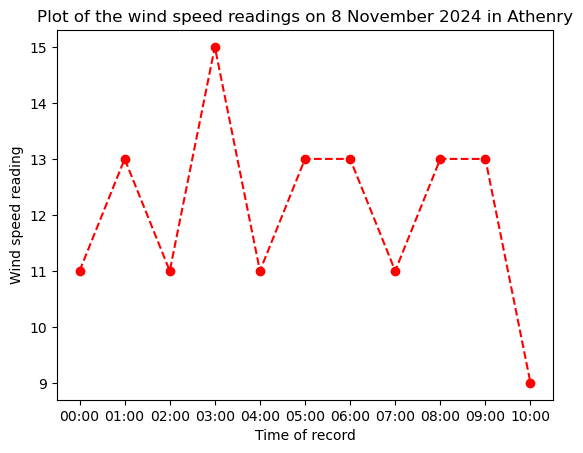

In [23]:
import matplotlib.pyplot as plt

y = df['windSpeed']
x = df['reportTime']

fig, ax = plt.subplots()

plt.xlabel('Time of record')
plt.ylabel('Wind speed reading')
plt.title('Plot of the wind speed readings on 8 November 2024 in Athenry')

plt.plot(x,y,'ro--')


